# radial intensity profile code

For future reference

In [8]:
# Create a 3D sphere volume of value 1, with radius = 5 in a volume.
# The sphere is placed at a random position in the volume
import numpy as np

# Set the size of the 3D volume
size = 50

# Initialize a 3D numpy array with zeros
volume = np.zeros((size, size, size))

# Set the center and radius of the sphere randomly
center = np.array([np.random.randint(5, size - 5), np.random.randint(5, size - 5), np.random.randint(5, size - 5)])
radius = 5

# Loop over all coordinates in the 3D volume
for x in range(size):
    for y in range(size):
        for z in range(size):
            # Calculate the distance between the current coordinate and the center
            dist = np.sqrt((x-center[0])**2 + (y-center[1])**2 + (z-center[2])**2)
            # If the distance is less than the radius, set the value to 1
            if dist <= radius:
                volume[x,y,z] = 1

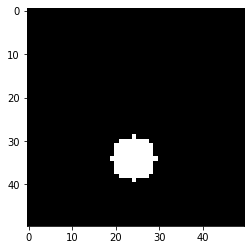

In [9]:
# Show volume in z (axis=0) projection
import matplotlib.pyplot as plt
volume = volume.astype(np.uint8)
plt.imshow(np.max(volume, axis=0), cmap="gray")

In [10]:
# Measure the centroid and area (voxel size) of the volume with regionprops
from skimage.measure import regionprops_table
props_test = regionprops_table(volume, properties=('centroid','area',))

# Save the measurement in pandas dataframe
import pandas as pd
props_test = pd.DataFrame(props_test)
props_test.head()

,centroid-0,centroid-1,centroid-2,area
0,6.0,34.0,24.0,515


In [11]:
# A function to calculate the radial intensity profile
def radial_intensity(image, x, y, z, r):
    # Get the shape of the image
    nx, ny, nz = image.shape
    
    # Create a grid of x, y, and z coordinates for the image
    xx, yy, zz = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing='ij')
    
    # Calculate the distance of each voxel from the center
    dist = np.sqrt((xx-x)**2 + (yy-y)**2 + (zz-z)**2)
    
    # Group voxels by radial distance and calculate the mean intensity of each group
    bins = np.arange(0, r+1, 1)
    indices = np.digitize(dist.flat, bins)
    mean_intensity = [image.flat[indices==i].mean() for i in range(1, len(bins))]
    
    return mean_intensity

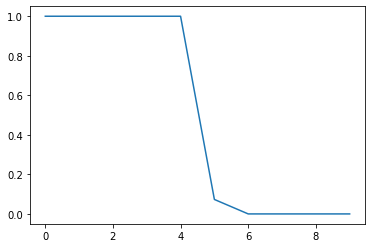

In [12]:
# Set the center and radius for the radial intensity calculation
center = (0, 0, 0)
radius = 10

# Loop over the rows of the DataFrame and calculate the radial intensity for each point
radial_intensity_list = []
for i, row in props_test.iterrows():
    x = row['centroid-0']
    y = row['centroid-1']
    z = row['centroid-2']
    radial_intensity_value = radial_intensity(volume, x, y, z, radius)
    radial_intensity_list.append(radial_intensity_value)

# Plot the radial intensity profile    
plt.plot(radial_intensity_value)